# 7장 비정상 자기회귀이동평균과정

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

C:\Users\DongMin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
C:\Users\DongMin\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


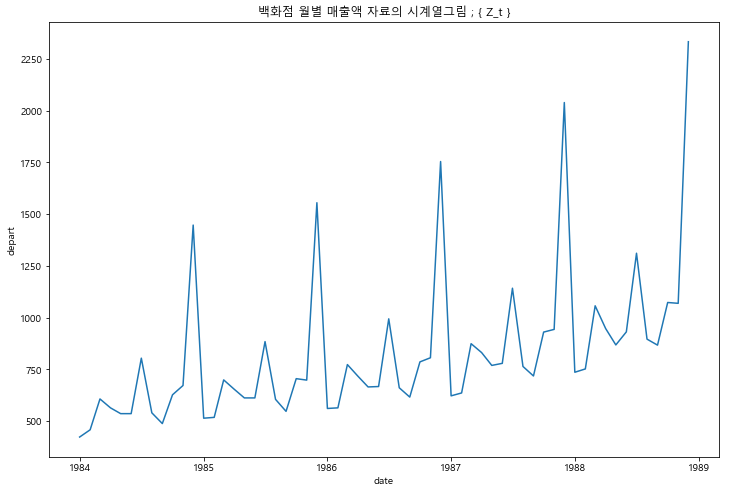

In [3]:
#P.255 그림 7-1 백화점 월별 매출액 자료의 시계열 그림 : {Z_t}
df='C:/Users/DongMin/Desktop/depart.txt'
date=pd.date_range('1984-01', periods=60, freq='MS')
with open(df, 'r') as f:
    data= pd.read_csv(f, sep='  ',names=list(range(12)))     #data가 monthly이기 때문에 range(12)
    new_data = np.array(data).flatten()

plt.figure(figsize=(12,8))
plt.plot(date, new_data, label='sales')
plt.title('백화점 월별 매출액 자료의 시계열그림 ; { Z_t }')
plt.xlabel('date')
plt.ylabel('depart')
plt.show()

In [4]:
# 그림 7-1은 완만하게 증가하는 추세를 보이고, 매년 월별 매출액이 유사한 형태로 반복되는 계절성을 보인다.
# 마지막으로 분산이 시간의 흐름에 따라 일정하지 않고 증가한다.

C:\Users\DongMin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


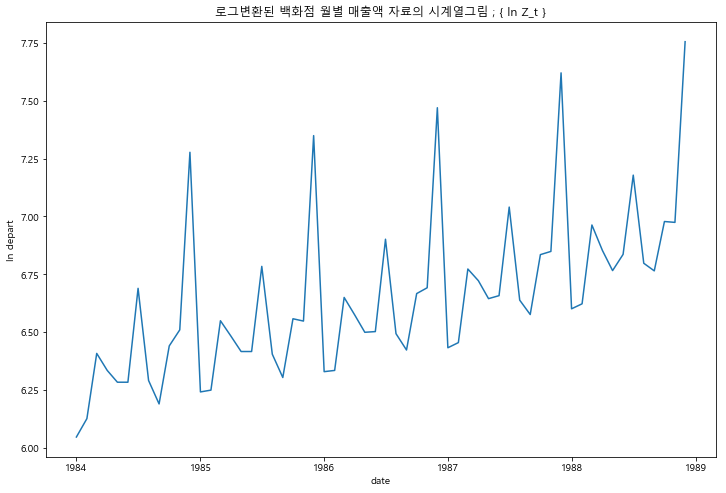

In [5]:
# P.256 그림7-2 로그변환된 백화점 월별 매출액 자료의 시계열그림
df='C:/Users/DongMin/Desktop/depart.txt'
date=pd.date_range('1984-01', periods=60, freq='MS')
with open(df, 'r') as f:
    data= pd.read_csv(f, sep='  ',names=list(range(12)))     
    ln_data=np.log(data)   #data의 분산을 상수화 시키기 위해 로그변환
    new_data = np.array(ln_data).flatten()   # 로그변환한 데이터의 전치행렬

plt.figure(figsize=(12,8))
plt.plot(date, new_data, label='sales')
plt.title('로그변환된 백화점 월별 매출액 자료의 시계열그림 ; { ln Z_t }')
plt.xlabel('date')
plt.ylabel('ln depart')
plt.show()

In [6]:
#로그 변환을 취한 후 백화점 자료 시계열이 시간대별로 분산이 일정해짐.

C:\Users\DongMin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


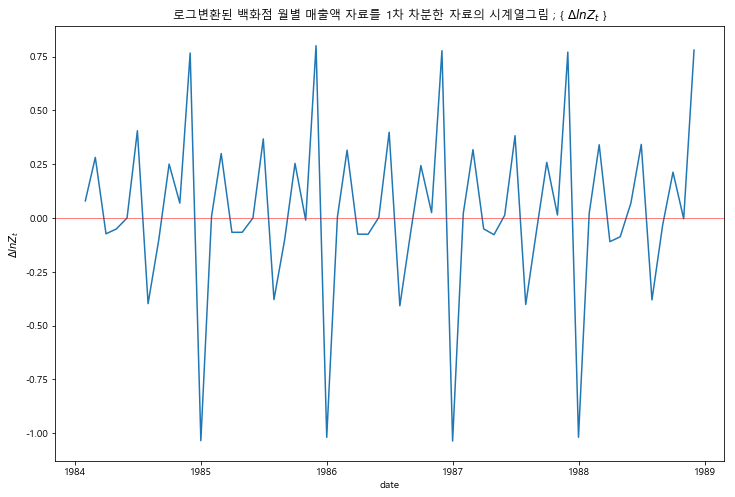

In [7]:
#P.263 그림 7-5 로그변환한 백화점 월별 매출액 자료를 1차 차분한 자료의 시계열그림; delta ln Z_t
df='C:/Users/DongMin/Desktop/depart.txt'
date=pd.date_range('1984-02', periods=59, freq='MS')
with open(df, 'r') as f:
    data= pd.read_csv(f, sep='  ',names=list(range(12)))
    ln_data=np.log(data)
    new_data = np.array(ln_data).flatten()
    diff_data=np.diff(new_data)

plt.figure(figsize=(12,8))
plt.plot(date, diff_data)
plt.axhline(y=0, color='r',linewidth=0.5)
plt.title('로그변환된 백화점 월별 매출액 자료를 1차 차분한 자료의 시계열그림 ; { $ \Delta ln Z_t $ }')
plt.xlabel('date')
plt.ylabel('$ \Delta ln Z_t $')
plt.show()

In [8]:
# 백화점 매출액을 로그변환한 그림 7-2는 여전히 선형추세를 갖는 비정상성을 보인다.
# 이러한 선형추세에 의한 비정상성을 제거하기 위해 1차 차분을 적용한 후 시계열 그림 7-5는 증가하는 추세가 나타나지 않음.
# 그러나 여전히 동일한 패턴이 반복되는 계절성이 존재

C:\Users\DongMin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


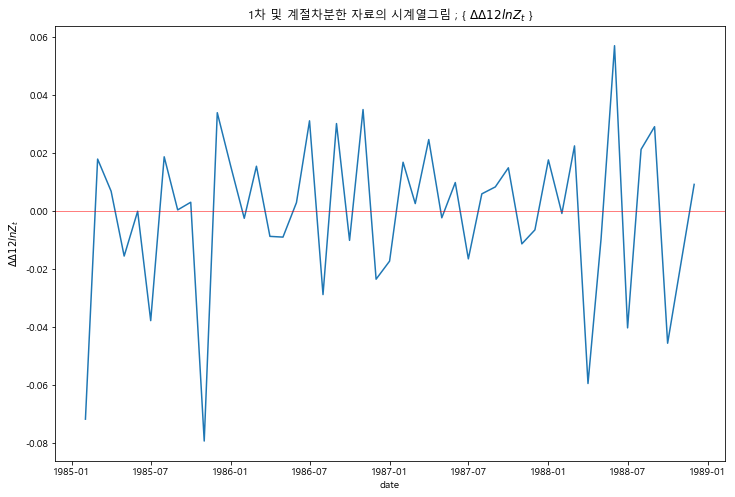

In [9]:
# P.265 그림7-6 1차 및 계절차분한 자료의 시계열그림
df='C:/Users/DongMin/Desktop/depart.txt'
date=pd.date_range('1985-02', periods=47, freq='MS')
with open(df, 'r') as f:
    data= pd.read_csv(f, sep='  ',names=list(range(12)))     
    ln_data=np.log(data)
    new_data = np.array(ln_data).flatten()
    
    #로그차분한 data를 1차 및 계절차분
    diff_data12=diff(new_data, k_diff=1, k_seasonal_diff=1, seasonal_periods=12) 
plt.figure(figsize=(12,8))
plt.plot(date, diff_data12)
plt.axhline(y=0, color='r',linewidth=0.5)
plt.xlabel('date')
plt.ylabel('$ \Delta \Delta 12 ln Z_t $')
plt.title('1차 및 계절차분한 자료의 시계열그림 ; { $ \Delta \Delta 12 ln Z_t $ }')
plt.show()

C:\Users\DongMin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


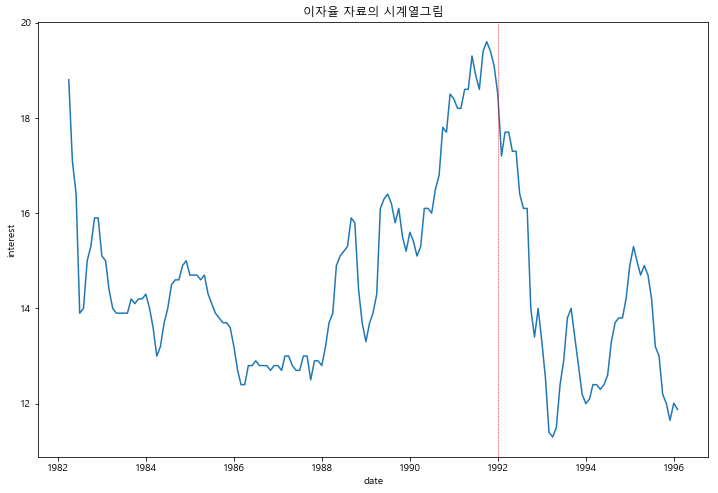

In [10]:
# P.259 그림7-3 이자율 자료의 시계열그림
df='C:/Users/DongMin/Desktop/interest.txt'
date=pd.date_range('1982-04', periods=168, freq='MS')
with open(df, 'r') as f:
    data= pd.read_csv(f, sep='  ',names=list(range(24)))     #자료가 24개월 단위로 끊어져 있어서 range(24)
    new_data = np.array(data).flatten()

plt.figure(figsize=(12,8))
plt.plot(date, new_data, label='interest')
plt.title('이자율 자료의 시계열그림')
plt.xlabel('date')
plt.ylabel('interest')
plt.axvline(x='1992', color='r',linestyle='--',linewidth=0.5)
plt.show()

In [11]:
# 그림 7-3의 그래프는 어느 기간은 일정한 기울기로 증가 어느 기간은 감소하는 경향을 보여서 결정적 추세X
# 확률적 추세를 가짐.

In [12]:
#P.262 확률보행과정을 따르는 자료 Z_t와 1차 차분된 자료 delta Z_t의 시계열그림
z1=0
x_list=[]
y_list=[]
for i in range(0,300):      #P.261에 7-5식 참고
    e=np.random.normal(0,1,1)
    z=z1+e
    x_list.append(i)
    y_list.append(z)
    z1=z

<function matplotlib.pyplot.show(*args, **kw)>

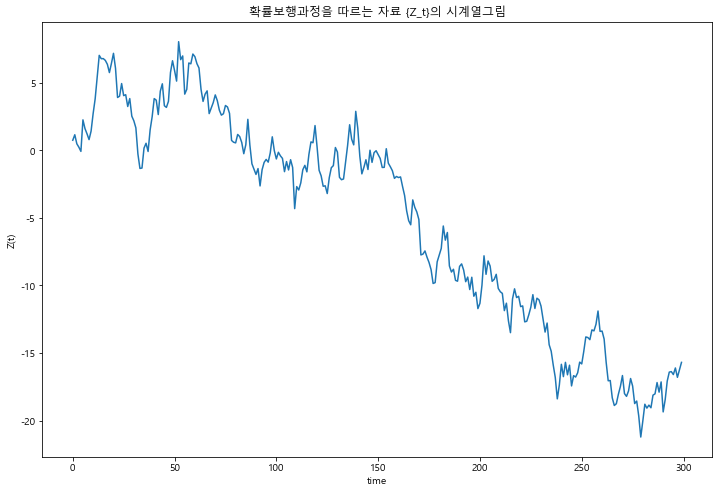

In [13]:
plt.figure(figsize=(12,8))
plt.plot(x_list, y_list)
plt.title('확률보행과정을 따르는 자료 {Z_t}의 시계열그림')
plt.xlabel('time')
plt.ylabel('Z(t)')
plt.show

In [14]:
#Z_t식을 1차 차분한 자료 deltaZ_t의 시계열그림
z1=0
x_list=[]
y_list=[]
for i in range(0,300):
    e=np.random.normal(0,1,2)    
    z=z1+e
    diff_1=np.diff(z)
    x_list.append(i)
    y_list.append(diff_1)
    z=z1

<function matplotlib.pyplot.show(*args, **kw)>

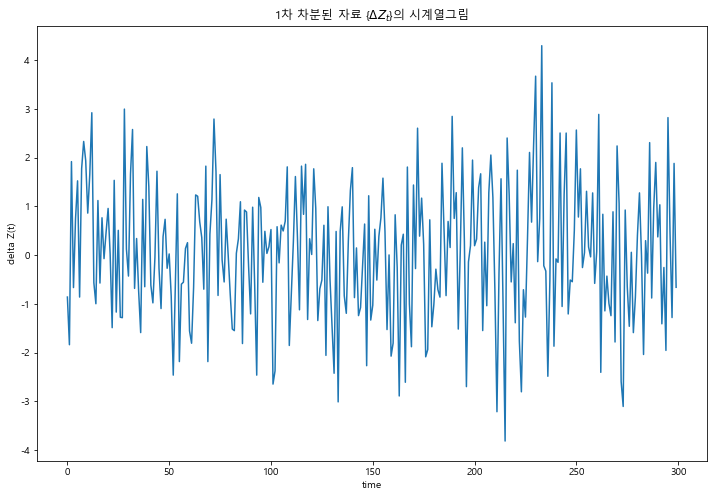

In [15]:
plt.figure(figsize=(12,8))
plt.plot(x_list, y_list)
plt.title('1차 차분된 자료 {$ \Delta Z_t $}의 시계열그림')
plt.xlabel('time')
plt.ylabel('delta Z(t)')
plt.show

In [16]:
#시계열그림 Z_t가 확률적 추세를 갖는 반면 1차 차분한 delta Z_t의 시계열그림은 비정상성을 보이지 않음을 알 수 있다.

In [17]:
# P.269 ARIMA(1,1,1)과정의 시계열그림, SACF, SPACF, SIACF
z1=0
z2=0
e1=0
x_list=[]
y_list=[]
for i in range(1,300):
    e=np.random.normal(0,1,1)
    z=1.8*z1-0.8*z2+e-0.5*e1
    x_list.append(i)
    y_list.append(z)
    z2=z1
    z1=z
    e1=e

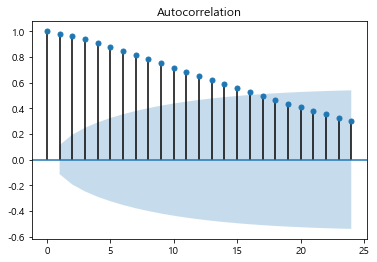

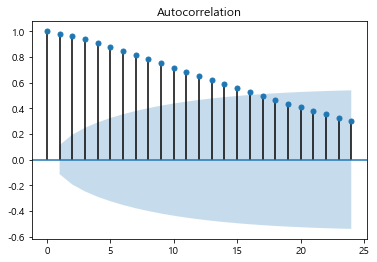

In [18]:
plot_acf(y_list, lags=24)

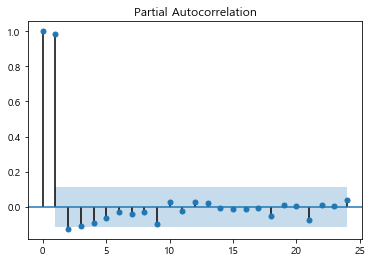

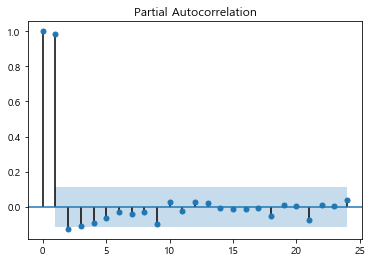

In [19]:
plot_pacf(y_list, lags=24)

In [20]:
#평균수준이 일정하지 않고 SACF는 서서히 감소하는 양상을 보이는 비정상성을 갖는다.

In [21]:
# P.270 ARIMA(1,1,1)과정의 시계열을 1차 차분한 후의 시계열그림과 SACF, SPACF, SIACF
z1=0
z2=0
e1=0
x_list=[]
y_list=[]
for i in range(0,300):
    e=np.random.normal(0,1,1)
    z=1.8*z1-0.8*z2+e-0.5*e1
    x_list.append(i)
    y_list.append(z)
    z2=z1
    z1=z
    e1=e
diff_1=diff(y_list, k_diff=1, k_seasonal_diff=None, seasonal_periods=0) 

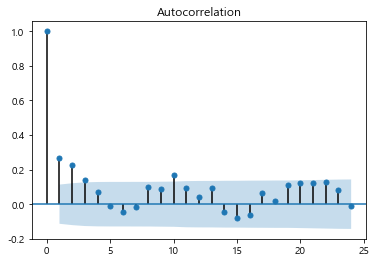

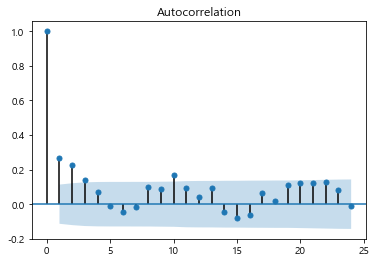

In [22]:
plot_acf(diff_1, lags=24)

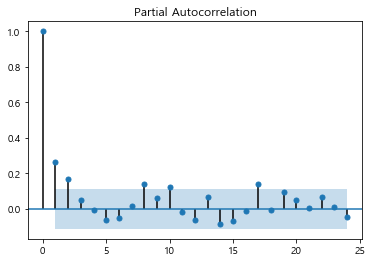

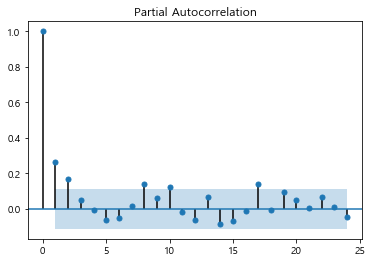

In [23]:
plot_pacf(diff_1,lags=24)